# Introducing Slider Component

In [1]:
import numpy as np
import pandas as pd
from PIL import Image

import matplotlib.pyplot as plt

from dash import Dash, html, dcc, Input, Output

import plotly.express as px
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook_connected"

## 1. Getting and exploring the data

In [2]:
# Load the dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00616/Tetuan%20City%20power%20consumption.csv')

In [3]:
# Changing DateTime column to datetime
df.DateTime = pd.to_datetime(df.DateTime)

In [4]:
# Renaming some columns
df.rename(columns={'Zone 1 Power Consumption': 'Zone1', 
                   'Zone 2  Power Consumption': 'Zone2', 
                   'Zone 3  Power Consumption': 'Zone3'}, inplace=True)

In [5]:
# Getting one value per day
dfd = df.groupby(pd.Grouper(key='DateTime', freq='1D')).mean().reset_index()

In [6]:
# Getting the month
dfd['month'] = [d.strftime('%m') for d in dfd.DateTime]
dfd.month = dfd.month.astype(int)
dfd.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone1,Zone2,Zone3,month
0,2017-01-01,9.675299,68.519306,0.315146,121.390771,25.993924,28465.232067,17737.791287,17868.795181,1
1,2017-01-02,12.476875,71.456319,0.076563,120.404486,27.227410,28869.493671,19557.725431,17820.763053,1
2,2017-01-03,12.100000,74.981667,0.076715,120.686014,28.574660,30562.447257,20057.269504,17620.803213,1
3,2017-01-04,10.509479,75.459792,0.082417,122.959319,28.827222,30689.831224,20102.077001,17673.694779,1
4,2017-01-05,10.866444,71.040486,0.083896,118.749861,29.741437,30802.911393,20033.941237,17664.176707,1


In [7]:
# Selecting January (dfd.month = 1)
filtered_data = dfd[dfd['month'] == 1]

In [8]:
# Plotting the scatter plot of the filtered_data
scatter_fig = px.scatter(filtered_data, x='Temperature', y=['Zone1','Zone2','Zone3'], 
        color_discrete_sequence=['orangered','darkorange','seagreen'],
        hover_name='variable', 
        hover_data={'variable':None, 'value':':.2f', 'Temperature':':.2f'}, 
        labels={
            'variable': 'Zone',
            'value': 'Power Consumption',
        } 
    )
scatter_fig.update_xaxes(range=[0, dfd.Temperature.max()+5])
scatter_fig.update_yaxes(range=[0, dfd.Zone1.max()+5000])

## 2. Building the layout 

In [9]:
# Creating the Dash app
app = Dash()

In [10]:
app.layout = html.Div(children=[
    # Defining the title
    html.H1(id='H1', children='Power Consumption in Tetouan, 2017', 
            style={'textAlign':'center', 'color':'green'}),
    # Defining a subtitle           
    html.H3(id='H3', children='(Introducing Slider)', 
            style={'textAlign':'center'}),                
    # Defining a vertical slider        
    html.Div(
        dcc.Slider(
            # defining min and max values
            min=int(dfd.month.min()),
            max=int(dfd.month.max()),
            # defining the step
            step=1,
            # defining the initial value, March for instance
            value=3,
            marks={
                1: 'Jan',
                2: 'Feb', 
                3: 'Mar', 
                4: 'Apr', 
                5: 'May', 
                6: 'Jun', 
                7: 'Jul', 
                8: 'Aug', 
                9: 'Sep', 
                10: 'Oct', 
                11: 'Nov', 
                12: 'Dec'
            },
            included = False,
            # Vertical Slider
            vertical = True,    
            id='month-slider'        
        ), # end of Slider
        style={'width': '8%', 'display': 'inline-block', 'margin-left': '30px'} ),
    # Defining the graph.  
    html.Div(
        dcc.Graph(id='power-scatter'), 
        style={'width': '80%', 'display': 'inline-block'})
], style={'backgroundColor': 'white'})


## 3. Adding interactivity with callback functions

This dashboard will have one `Input`, the `RadioItems` value, and one `Output`, a graph.

In [11]:
# Set up the callback function
@app.callback(
    Output(component_id='power-scatter', component_property='figure'),
    Input (component_id='month-slider',  component_property='value')
)
def update_graph(selected_data):
    filtered_data = dfd[dfd['month'] == selected_data]

    scatter_fig = px.scatter(filtered_data, x='Temperature', y=['Zone1','Zone2','Zone3'], 
        color_discrete_sequence=['orangered','darkorange','seagreen'],
        hover_name='variable', 
        hover_data={'variable':None, 'value':':.2f', 'Temperature':':.2f'}, 
        labels={
            'variable': 'Zone',
            'value': 'Power Consumption',
        })
    scatter_fig.update_xaxes(range=[0, dfd.Temperature.max()+5])
    scatter_fig.update_yaxes(range=[0, dfd.Zone1.max()+5000])    
    return scatter_fig

## 4. Running the dashboard

In [12]:
# Run app 
if __name__ == '__main__':
    app.run_server(debug=True, port=8088)

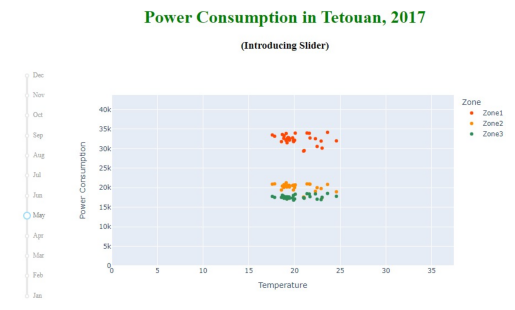

In [13]:
# Showing an image of the dashboard
image_s = Image.open('sliderDash.jpg')
image_s = np.array(image_s)
plt.imshow(image_s)
plt.axis('off');

![Optional Alt Text](sliderDash.jpg)

## References

- https://dash.plotly.com/dash-core-components/slider
- Salam, A., & El Hibaoui, A. (2018) "Comparison of Machine Learning Algorithms for the Power Consumption Prediction: -Case Study of Tetouan city". In 2018 6th International Renewable and Sustainable Energy Conference (IRSEC) (pp. 1-5)